# Lab | Cleaning numerical data 

## Import the necessary libraries.

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import re

pd.set_option('display.max_columns', None)

## Load the we_fn_use_c_marketing_customer_value_analysis.csv into the variable customer_df

In [19]:
variable_customer_df = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv')

## First look at its main features (head, shape, info).

In [20]:
display(variable_customer_df.shape)

(9134, 24)

In [21]:
variable_customer_df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [22]:
variable_customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

## Rename the columns so they follow the PE8 (snake case) (lower_case_with_underscores)

In [23]:
variable_customer_df.columns
column_names = variable_customer_df.columns
column_names

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [24]:
cols = []
for column in variable_customer_df.columns:
    cols.append(column.lower().replace(' ','_'))
cols
variable_customer_df.columns = cols

variable_customer_df.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


## Change effective to date column to datetime format.

In [25]:
variable_customer_df['effective_to_date'] = pd.to_datetime(variable_customer_df['effective_to_date'], errors='coerce')

In [26]:
variable_customer_df

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2011-02-10,Employed,M,71941,Urban,Married,73,18,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2011-02-12,Employed,F,21604,Suburban,Divorced,79,14,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2011-02-06,Unemployed,M,0,Suburban,Single,85,9,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2011-02-03,Employed,M,21941,Suburban,Married,96,34,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


## Define a function that differentiates between continuous and discrete variables. Hint: The number of unique values might be useful. Store continuous data into a continuous_df variable and do the same for discrete_df

In [27]:
variable_customer_df_num = variable_customer_df.select_dtypes(include = np.number)
variable_customer_df_num.columns

Index(['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies',
       'total_claim_amount'],
      dtype='object')

In [28]:
for column in variable_customer_df.columns:
#     print(column, ":", variable_customer_df[column].unique()) # unique values for each column
    print(column, ":", len(variable_customer_df[column].unique())) # number of unique value for each column

customer : 9134
state : 5
customer_lifetime_value : 8041
response : 2
coverage : 3
education : 5
effective_to_date : 59
employmentstatus : 5
gender : 2
income : 5694
location_code : 3
marital_status : 3
monthly_premium_auto : 202
months_since_last_claim : 36
months_since_policy_inception : 100
number_of_open_complaints : 6
number_of_policies : 9
policy_type : 3
policy : 9
renew_offer_type : 4
sales_channel : 4
total_claim_amount : 5106
vehicle_class : 6
vehicle_size : 3


In [29]:
# def value_counts(df):
#     for column in df.columns:
#         print(column, ":", len(df[column].unique())) # number of unique value for each column
#     return

In [30]:
# value_count(variable_customer_df_num)

In [31]:
def cont_disc(df): # df = dataframe to pass function to
        
    continuous_lst = [] # set up empty lists
    discrete_lst = []
    
    # column becomes the next column name
    for column in df.columns:               # < (df.shape[0] * 0.02) another option to differentiate: if the number of rows is less than cutoff it is discrete; more than cutoff, it is continuous
        if len(df[column].unique()) >= 202: # I chose 202 as a cutoff to differentiate the continuous and discrete variables.
            continuous_lst.append(column) #append column name to continuous
        else:
            discrete_lst.append(column)
    
    return continuous_lst, discrete_lst

In [32]:
continuous_var, discrete_var = cont_disc(variable_customer_df_num)

print('continuous=', continuous_var)
print('discrete=', discrete_var)

continuous= ['customer_lifetime_value', 'income', 'monthly_premium_auto', 'total_claim_amount']
discrete= ['months_since_last_claim', 'months_since_policy_inception', 'number_of_open_complaints', 'number_of_policies']


In [33]:
display(continuous_var)
display(discrete_var)

['customer_lifetime_value',
 'income',
 'monthly_premium_auto',
 'total_claim_amount']

['months_since_last_claim',
 'months_since_policy_inception',
 'number_of_open_complaints',
 'number_of_policies']

In [34]:
continuous_df = variable_customer_df_num[['customer_lifetime_value', 'income','monthly_premium_auto','total_claim_amount']]
continuous_df

,customer_lifetime_value,income,monthly_premium_auto,total_claim_amount
0,2763.519279,56274,69,384.811147
1,6979.535903,0,94,1131.464935
2,12887.431650,48767,108,566.472247
3,7645.861827,0,106,529.881344
4,2813.692575,43836,73,138.130879
...,...,...,...,...
9129,23405.987980,71941,73,198.234764
9130,3096.511217,21604,79,379.200000
9131,8163.890428,0,85,790.784983
9132,7524.442436,21941,96,691.200000


In [35]:
discrete_df = variable_customer_df_num[['months_since_last_claim', 'months_since_policy_inception','number_of_open_complaints','number_of_policies']]
discrete_df

,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,32,5,0,1
1,13,42,0,8
2,18,38,0,2
3,18,65,0,7
4,12,44,0,1
...,...,...,...,...
9129,18,89,0,2
9130,14,28,0,1
9131,9,37,3,2
9132,34,3,0,3


In [36]:
# return continuous and discrete dataframes inside function

# def cont_disc2(df): # df = dataframe to pass function to
        
#     continuous_lst = [] # set up empty lists
#     discrete_lst = []
    
#     # column becomes the next column name
#     for column in df.columns:               # < (df.shape[0] * 0.02) another option to differentiate: if the number of rows is less than cutoff it is discrete; more than cutoff, it is continuous
#         if len(df[column].unique()) >= 202: # I chose 202 as a cutoff to differentiate the continuous and discrete variables.
#             continuous_lst.append(column) #append column name to continuous
#         else:
#             discrete_lst.append(column)
    
#     continuous_df = df[continuous_lst]
#     discrete_df = df[discrete_lst]

#     return continuous_df, discrete_df

In [37]:
# continuous_df, discrete_df = disc_cont2(variable_customer_df_num)

In [38]:
# continuous_df

In [39]:
# discrete_df

## Plot a correlation matrix, comment what you see.

In [40]:
correlations = variable_customer_df.corr()
correlations.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
customer_lifetime_value,1.000000,0.024366,0.396262,0.011517,0.009418,-0.036343,0.021955,0.226451
income,0.024366,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,-0.355254
monthly_premium_auto,0.396262,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.632017
months_since_last_claim,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136,0.007563
months_since_policy_inception,0.009418,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.003335


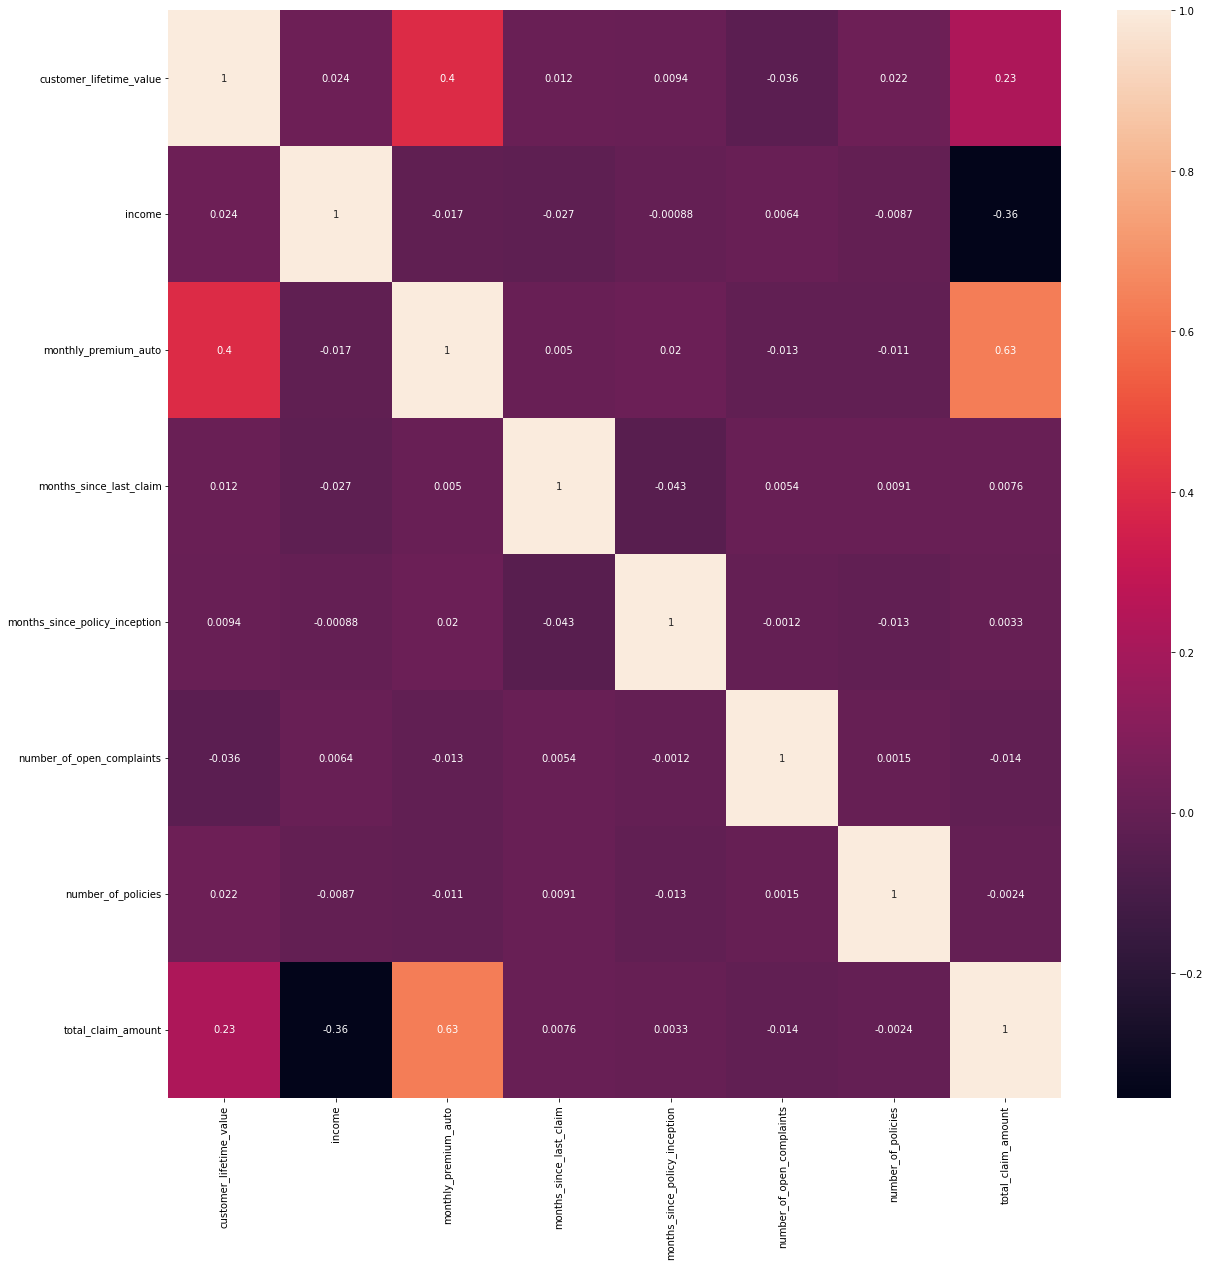

In [41]:
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(correlations, annot=True)
plt.show()

In [42]:
# There is no feature making high collinearity (such as 0.9%). No column was dropped.

## Create a function to plot every discrete variable. Do the same with the continuous variables (Be Careful, you may need to change the plot type to one better suited for continuous data!)

In [43]:
def plot(x):

    for column in x.columns:
        sns.displot(x[column], kde=True)
        plt.show()
    
    return plt

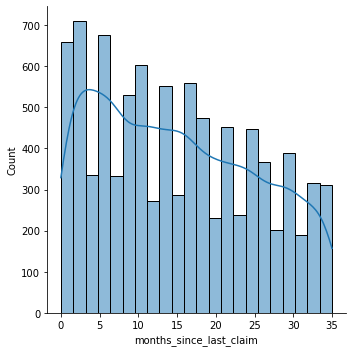

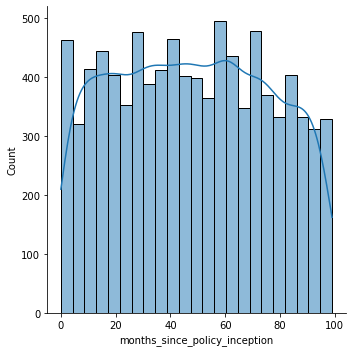

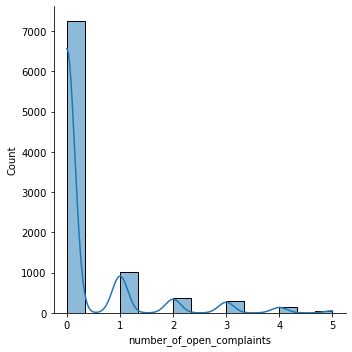

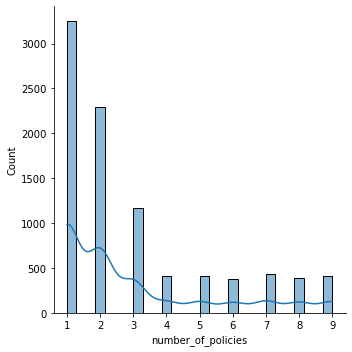

<module 'matplotlib.pyplot' from '/Users/ozguryildirim/opt/anaconda3/lib/python3.9/site-packages/matplotlib/pyplot.py'>


In [44]:
print(plot(discrete_df))

In [45]:
def plot_cont(x):

    for column in x.columns:
        x[column].hist()
        plt.show()
    
    return plt

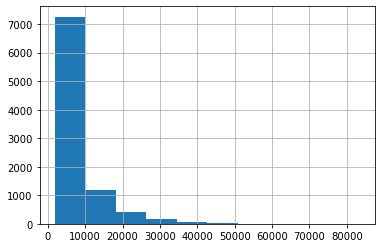

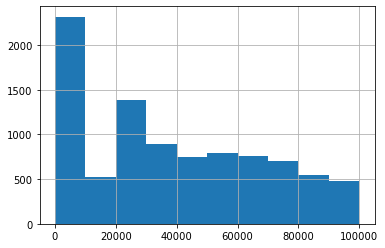

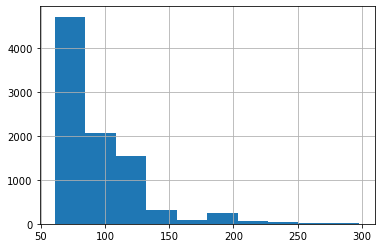

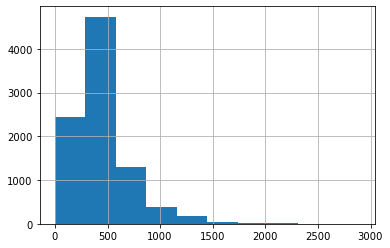

<module 'matplotlib.pyplot' from '/Users/ozguryildirim/opt/anaconda3/lib/python3.9/site-packages/matplotlib/pyplot.py'>


In [46]:
print(plot_cont(continuous_df))

## Comment what you can see in the plots.

In [47]:
# Discrete variables: distribution plots show that month_since_last_claim and month_since_policy_inception
# has relatively equally distributed values. Number_of_open_complaints and number_of_policies have outliers.

# There are outliers in all continuous variables.

## Look for outliers in the continuous variables. (HINT: There’s a good plot to do that!)

In [48]:
def box_cont(x):

    for column in x.columns:
        sns.boxplot(y=x[column])
        plt.show()
    
    return plt

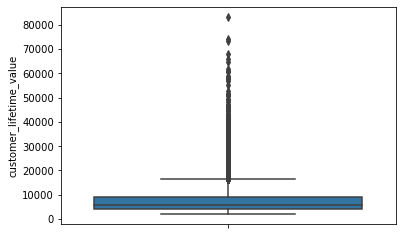

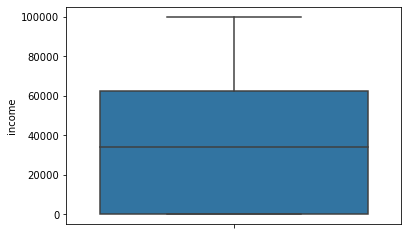

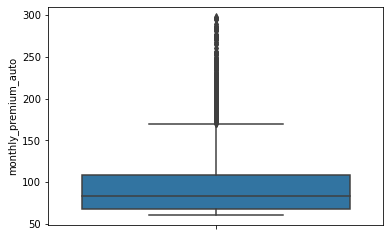

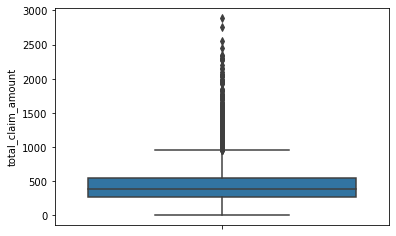

<module 'matplotlib.pyplot' from '/Users/ozguryildirim/opt/anaconda3/lib/python3.9/site-packages/matplotlib/pyplot.py'>


In [49]:
print(box_cont(continuous_df))

In [50]:
def outliers(column):
        
    q25 = np.percentile(sorted(column),25)

    q75 = np.percentile(sorted(column),75) 
        
    iqr = q75 - q25
    
    upper_limit = q75 + 1.5*iqr
    
    lower_limit = q25 - 1.5*iqr
        
    outliers = [x for x in column if x <= lower_limit or x >= upper_limit]
    
    return outliers

In [51]:
tca_outliers = outliers(continuous_df['total_claim_amount'])
tca_outliers

[1131.464935,
 982.399613,
 975.107098,
 1087.995426,
 1122.658899,
 1836.0,
 1124.427734,
 1284.093173,
 2345.413441,
 1101.6,
 1159.2,
 1252.406235,
 1003.160633,
 1317.6,
 1090.86434,
 1337.063487,
 980.169081,
 1324.8,
 1171.93117,
 1214.4,
 1002.782553,
 1210.920949,
 2027.724442,
 1382.4,
 1577.674417,
 1193.036154,
 1300.8,
 1265.570302,
 1022.4,
 1300.8,
 1254.137899,
 972.0,
 1310.4,
 1360.8,
 1416.0,
 1008.0,
 2893.239678,
 1185.988301,
 1228.8,
 1353.6,
 1027.000029,
 1027.177255,
 1336.931716,
 1067.333126,
 1418.4,
 1027.2,
 1300.8,
 1149.203884,
 1027.2,
 1261.943541,
 964.8,
 1294.700423,
 1253.984948,
 1027.000029,
 1032.0,
 973.787176,
 1358.4,
 1207.084251,
 1605.6,
 989.105367,
 1294.700423,
 972.0,
 1965.6,
 1448.994134,
 1186.972445,
 979.2,
 1178.995926,
 1353.6,
 1377.6,
 1777.471271,
 1382.4,
 1767.348807,
 1171.2,
 964.8,
 1227.458548,
 1072.8,
 1051.2,
 2201.327879,
 1012.249308,
 1052.933035,
 1272.546918,
 1128.0,
 1286.4,
 1129.929433,
 1171.537594,
 1012.8

In [52]:
income_outliers = outliers(continuous_df['income'])
income_outliers # income column has no outlier

[]

In [53]:
customer_lifetime_value_outliers = outliers(continuous_df['customer_lifetime_value'])
customer_lifetime_value_outliers

[24127.50402,
 24127.50402,
 18975.45611,
 36707.42639,
 33473.34946,
 24261.01777,
 22643.83478,
 58166.55351,
 20946.19251,
 24084.5352,
 31221.7481,
 19776.56654,
 21343.46599,
 16936.27147,
 23706.11337,
 32269.85139,
 25755.27817,
 16706.11699,
 17840.19555,
 17930.60451,
 29328.04185,
 22855.61209,
 16727.56063,
 18042.47942,
 31161.74523,
 25585.72783,
 32654.8383,
 22103.5072,
 18211.14319,
 23444.90045,
 33473.34946,
 44795.46942,
 28685.82785,
 18929.3306,
 24143.87556,
 29091.23936,
 19834.20115,
 35537.846,
 34611.37896,
 20216.30883,
 27776.28906,
 21903.91364,
 18073.93999,
 23594.6802,
 19582.46887,
 36057.53702,
 20714.94043,
 17497.52201,
 35850.59935,
 23875.47675,
 30475.78048,
 21435.87782,
 26843.12452,
 29194.36639,
 27789.69235,
 21423.63723,
 25830.90982,
 24127.50402,
 17857.97233,
 17771.54902,
 18269.27017,
 27580.55396,
 21147.27716,
 22500.88348,
 24980.22553,
 18361.55525,
 32196.60037,
 34931.00171,
 19069.49954,
 40224.01359,
 21850.84002,
 44771.29936,


In [54]:
monthly_premium_auto_outliers = outliers(continuous_df['monthly_premium_auto'])
monthly_premium_auto_outliers

[237,
 172,
 186,
 192,
 217,
 255,
 190,
 245,
 225,
 171,
 244,
 183,
 176,
 183,
 230,
 177,
 196,
 276,
 253,
 180,
 203,
 192,
 198,
 193,
 271,
 188,
 271,
 206,
 196,
 193,
 182,
 189,
 295,
 210,
 182,
 239,
 188,
 256,
 188,
 173,
 196,
 192,
 285,
 197,
 199,
 214,
 171,
 198,
 271,
 214,
 175,
 199,
 194,
 181,
 180,
 239,
 222,
 215,
 283,
 248,
 223,
 239,
 273,
 213,
 185,
 188,
 287,
 180,
 196,
 192,
 297,
 244,
 201,
 192,
 189,
 196,
 235,
 196,
 183,
 268,
 171,
 182,
 211,
 192,
 187,
 235,
 276,
 185,
 198,
 242,
 193,
 186,
 210,
 210,
 175,
 199,
 180,
 197,
 223,
 215,
 276,
 276,
 180,
 186,
 172,
 215,
 212,
 199,
 249,
 181,
 187,
 240,
 196,
 189,
 181,
 181,
 225,
 199,
 192,
 201,
 245,
 193,
 295,
 191,
 187,
 199,
 186,
 181,
 239,
 199,
 195,
 180,
 216,
 173,
 182,
 199,
 196,
 194,
 185,
 249,
 185,
 191,
 199,
 181,
 193,
 211,
 214,
 187,
 179,
 232,
 244,
 193,
 181,
 181,
 182,
 214,
 183,
 185,
 185,
 187,
 198,
 211,
 190,
 186,
 181,
 212,
 181

## Did you find outliers? Comment what you will do with them.

In [55]:
# Although 'outliers' function determines that the columns of continuous_df except 'income' have outliers, boxes plots do not suggest
# so many outliers in the columns of continuous_df.

## Check all columns for NaN values. Decide what (if anything) you will need to do with them.

In [56]:
# no null value in the variable_customer_df 
variable_customer_df.isnull().sum()

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

# Lab | Cleaning categorical data.

## Import the necessary libraries if you are starting a new notebook. Using the same data as the previous lab: we_fn_use_c_marketing_customer_value_analysis.csv

In [57]:
# Same file is imported in the beginning of the notebook.

## Find all of the categorical data. Save it in a categorical_df variable.

In [58]:
categorical_df = variable_customer_df.select_dtypes(include = object)
categorical_df.head()

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


## Check for NaN values.

In [59]:
# no null values
categorical_df.isnull().sum()

customer            0
state               0
response            0
coverage            0
education           0
employmentstatus    0
gender              0
location_code       0
marital_status      0
policy_type         0
policy              0
renew_offer_type    0
sales_channel       0
vehicle_class       0
vehicle_size        0
dtype: int64

## Check all unique values of columns.

In [60]:
for column in categorical_df.columns:
    print(column, ":", categorical_df[column].unique()) # unique values for each column
    print(column, ":", len(categorical_df[column].unique())) # number of unique value for each column

customer : ['BU79786' 'QZ44356' 'AI49188' ... 'TD14365' 'UP19263' 'Y167826']
customer : 9134
state : ['Washington' 'Arizona' 'Nevada' 'California' 'Oregon']
state : 5
response : ['No' 'Yes']
response : 2
coverage : ['Basic' 'Extended' 'Premium']
coverage : 3
education : ['Bachelor' 'College' 'Master' 'High School or Below' 'Doctor']
education : 5
employmentstatus : ['Employed' 'Unemployed' 'Medical Leave' 'Disabled' 'Retired']
employmentstatus : 5
gender : ['F' 'M']
gender : 2
location_code : ['Suburban' 'Rural' 'Urban']
location_code : 3
marital_status : ['Married' 'Single' 'Divorced']
marital_status : 3
policy_type : ['Corporate Auto' 'Personal Auto' 'Special Auto']
policy_type : 3
policy : ['Corporate L3' 'Personal L3' 'Corporate L2' 'Personal L1' 'Special L2'
 'Corporate L1' 'Personal L2' 'Special L1' 'Special L3']
policy : 9
renew_offer_type : ['Offer1' 'Offer3' 'Offer2' 'Offer4']
renew_offer_type : 4
sales_channel : ['Agent' 'Call Center' 'Web' 'Branch']
sales_channel : 4
vehicle

## Check dtypes. Do they all make sense as categorical data?

In [61]:
categorical_df.dtypes

# All columns have categorical values. This implies that the dataframe was fully categorized into numerical and
# categorical parts.

customer            object
state               object
response            object
coverage            object
education           object
employmentstatus    object
gender              object
location_code       object
marital_status      object
policy_type         object
policy              object
renew_offer_type    object
sales_channel       object
vehicle_class       object
vehicle_size        object
dtype: object

In [62]:
categorical_df.head(20)

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
5,OC83172,Oregon,Yes,Basic,Bachelor,Employed,F,Rural,Married,Personal Auto,Personal L3,Offer2,Web,Two-Door Car,Medsize
6,XZ87318,Oregon,Yes,Basic,College,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Four-Door Car,Medsize
7,CF85061,Arizona,No,Premium,Master,Unemployed,M,Urban,Single,Corporate Auto,Corporate L3,Offer1,Agent,Four-Door Car,Medsize
8,DY87989,Oregon,Yes,Basic,Bachelor,Medical Leave,M,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Agent,Four-Door Car,Medsize
9,BQ94931,Oregon,No,Extended,College,Employed,F,Urban,Married,Special Auto,Special L2,Offer2,Branch,Four-Door Car,Medsize


## Does any column contain alpha and numeric data? Decide how to clean it.



In [63]:
# Substitute NaNs with mode: this is not a great solution. In this way, we overemphasize the mode value of the column.
# We can improve a model (KNN classifier) to predict an intermediate target. 

In [64]:
# check for numeric values: there is no column that has only numeric values.
for column in categorical_df.columns:
    print(categorical_df[column].str.isnumeric().value_counts()) 

False    9134
Name: customer, dtype: int64
False    9134
Name: state, dtype: int64
False    9134
Name: response, dtype: int64
False    9134
Name: coverage, dtype: int64
False    9134
Name: education, dtype: int64
False    9134
Name: employmentstatus, dtype: int64
False    9134
Name: gender, dtype: int64
False    9134
Name: location_code, dtype: int64
False    9134
Name: marital_status, dtype: int64
False    9134
Name: policy_type, dtype: int64
False    9134
Name: policy, dtype: int64
False    9134
Name: renew_offer_type, dtype: int64
False    9134
Name: sales_channel, dtype: int64
False    9134
Name: vehicle_class, dtype: int64
False    9134
Name: vehicle_size, dtype: int64


In [65]:
# check for alpha values: there are some columns (i.e. state, education) that have alpha values.
for column in categorical_df.columns: 
    print(categorical_df[column].str.isalpha().value_counts()) 

False    9134
Name: customer, dtype: int64
True    9134
Name: state, dtype: int64
True    9134
Name: response, dtype: int64
True    9134
Name: coverage, dtype: int64
True     6512
False    2622
Name: education, dtype: int64
True     8702
False     432
Name: employmentstatus, dtype: int64
True    9134
Name: gender, dtype: int64
True    9134
Name: location_code, dtype: int64
True    9134
Name: marital_status, dtype: int64
False    9134
Name: policy_type, dtype: int64
False    9134
Name: policy, dtype: int64
False    9134
Name: renew_offer_type, dtype: int64
True     7369
False    1765
Name: sales_channel, dtype: int64
False    7338
True     1796
Name: vehicle_class, dtype: int64
True    9134
Name: vehicle_size, dtype: int64


In [66]:
# check for alphanumeric characters: there are some columns that have alphanumeric characters.
for column in categorical_df.columns:
    print(categorical_df[column].str.isalnum().value_counts()) 

True    9134
Name: customer, dtype: int64
True    9134
Name: state, dtype: int64
True    9134
Name: response, dtype: int64
True    9134
Name: coverage, dtype: int64
True     6512
False    2622
Name: education, dtype: int64
True     8702
False     432
Name: employmentstatus, dtype: int64
True    9134
Name: gender, dtype: int64
True    9134
Name: location_code, dtype: int64
True    9134
Name: marital_status, dtype: int64
False    9134
Name: policy_type, dtype: int64
False    9134
Name: policy, dtype: int64
True    9134
Name: renew_offer_type, dtype: int64
True     7369
False    1765
Name: sales_channel, dtype: int64
False    7338
True     1796
Name: vehicle_class, dtype: int64
True    9134
Name: vehicle_size, dtype: int64


## Would you choose to do anything else to clean or wrangle the categorical data? Comment your decisions.

In [67]:
# We can apply qcut or cut techniques to divide the categorical data into bins.
# For categorical variables we can plot the relation between bins and check outliers.

## Compare policy_type and policy. What information is contained in these columns. Can you identify what is important?

In [68]:
# Personal Auto     6788
# Corporate Auto    1968
# Special Auto       378
# Name: policy_type, dtype: int64
# Personal L3     3426
# Personal L2     2122
# Personal L1     1240
# Corporate L3    1014
# Corporate L2     595
# Corporate L1     359
# Special L2       164
# Special L3       148
# Special L1        66
# Name: policy, dtype: int64

In [69]:
# Policy_type column is divided into three; personal auto, corporate auto, and special auto.
# The personal auto, corporate auto, and special auto are subdivided into three in policy column.
# Therefore, detailed information is given in policy column.
# In this case, policy column could be removed since all the information in policy column are also given in policy_type column as a simplified classification.

## Check number of unique values in each column, can they be combined in any way to ease encoding? Comment your thoughts and make those changes.

In [70]:
# The unique values in policy column can be combined. 
# The policy_type column already has the combined version of the unique values in policy column.

# Luxury SUV and Luxury Car can be combined to form Luxury vales in vehicle_class.

# Disable, retired, and medical leave can be combined and attached into Unemployed value in employment status.

# Bachelor and college can be combined to form undergraduate value and Master and Doctor can be combined to form graduate value.

In [71]:
for column in categorical_df.columns:
    print(categorical_df[column].value_counts()) 

BU79786    1
PU81096    1
CO75086    1
WW52683    1
XO38850    1
          ..
HS14476    1
YL91587    1
CT18212    1
EW35231    1
Y167826    1
Name: customer, Length: 9134, dtype: int64
California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: state, dtype: int64
No     7826
Yes    1308
Name: response, dtype: int64
Basic       5568
Extended    2742
Premium      824
Name: coverage, dtype: int64
Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: education, dtype: int64
Employed         5698
Unemployed       2317
Medical Leave     432
Disabled          405
Retired           282
Name: employmentstatus, dtype: int64
F    4658
M    4476
Name: gender, dtype: int64
Suburban    5779
Rural       1773
Urban       1582
Name: location_code, dtype: int64
Married     5298
Single      2467
Divorced    1369
Name: marital_status, dtype: int64
Personal Auto     67

In [72]:
# categorical_df = categorical_df.drop(['policy'], axis=1)

In [73]:
# categorical_df = categorical_df.replace({'vehicle_class': {'Luxury SUV': 'Luxury', 'Luxury Car': 'Luxury'}})

# categorical_df = categorical_df.replace({'employmentstatus': {'Disabled': 'Unemployed', 'Retired': 'Unemployed ', 'Medical Leave': 'Unemployed'}})

# categorical_df = categorical_df.replace({'education': {'Master': 'Graduate', 'Doctor': 'Graduate', 'Bachelor': 'Undergraduate','College': 'Undergraduate'}})

In [74]:
for column in categorical_df.columns:
    print(categorical_df[column].value_counts()) 

BU79786    1
PU81096    1
CO75086    1
WW52683    1
XO38850    1
          ..
HS14476    1
YL91587    1
CT18212    1
EW35231    1
Y167826    1
Name: customer, Length: 9134, dtype: int64
California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: state, dtype: int64
No     7826
Yes    1308
Name: response, dtype: int64
Basic       5568
Extended    2742
Premium      824
Name: coverage, dtype: int64
Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: education, dtype: int64
Employed         5698
Unemployed       2317
Medical Leave     432
Disabled          405
Retired           282
Name: employmentstatus, dtype: int64
F    4658
M    4476
Name: gender, dtype: int64
Suburban    5779
Rural       1773
Urban       1582
Name: location_code, dtype: int64
Married     5298
Single      2467
Divorced    1369
Name: marital_status, dtype: int64
Personal Auto     67

# Lab | Feature extraction

## Open the categoricals variable we created before.

In [75]:
categoricals = variable_customer_df.select_dtypes(np.object)
categoricals.head()

/var/folders/tr/nqbjf62d721fqy35q732j79m0000gn/T/ipykernel_732/1122510197.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categoricals = variable_customer_df.select_dtypes(np.object)


,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


## Plot all the categorical variables with the proper plot. What can you see?

In [ ]:
# There are 9134 unique variables in customer column. I do not evalute the plot of customer column.

# When I look to other plots of the categorical variables, the data is imbalanced except for gender column.

# Distribution of the values in the columns varies. Oversampling, undersampling or smote can be applied.

In [ ]:
def plot_cat(df):
    for column in df.columns:
        sns.countplot(x=df[column])
        plt.show()
    return None

In [ ]:
plot_cat(categoricals)

## There might be some columns that seem to be redundant, check their values to be sure. What should we do with them?

In [76]:
# The unique values in policy column can be combined. 

# The customer column has 9134 unique values. It comprises alphanumeric characters. We need to combine the unique values in customer column to decrease the number of unique values. 

# The policy_type column already has the combined version of the unique values in policy column.

# Luxury SUV and Luxury Car can be combined to form Luxury vales in vehicle_class.

# Disable, retired, and medical leave can be combined and attached into Unemployed value in employment status.

# Bachelor and college can be combined to form undergraduate value and Master and Doctor can be combined to form graduate value.

In [77]:
categoricals.isnull().sum() # no null values.

customer            0
state               0
response            0
coverage            0
education           0
employmentstatus    0
gender              0
location_code       0
marital_status      0
policy_type         0
policy              0
renew_offer_type    0
sales_channel       0
vehicle_class       0
vehicle_size        0
dtype: int64

In [78]:
for column in categoricals.columns:
    print(column, ":", categoricals[column].unique()) # unique values for each column
    print(column, ":", len(categoricals[column].unique())) # number of unique value for each column

customer : ['BU79786' 'QZ44356' 'AI49188' ... 'TD14365' 'UP19263' 'Y167826']
customer : 9134
state : ['Washington' 'Arizona' 'Nevada' 'California' 'Oregon']
state : 5
response : ['No' 'Yes']
response : 2
coverage : ['Basic' 'Extended' 'Premium']
coverage : 3
education : ['Bachelor' 'College' 'Master' 'High School or Below' 'Doctor']
education : 5
employmentstatus : ['Employed' 'Unemployed' 'Medical Leave' 'Disabled' 'Retired']
employmentstatus : 5
gender : ['F' 'M']
gender : 2
location_code : ['Suburban' 'Rural' 'Urban']
location_code : 3
marital_status : ['Married' 'Single' 'Divorced']
marital_status : 3
policy_type : ['Corporate Auto' 'Personal Auto' 'Special Auto']
policy_type : 3
policy : ['Corporate L3' 'Personal L3' 'Corporate L2' 'Personal L1' 'Special L2'
 'Corporate L1' 'Personal L2' 'Special L1' 'Special L3']
policy : 9
renew_offer_type : ['Offer1' 'Offer3' 'Offer2' 'Offer4']
renew_offer_type : 4
sales_channel : ['Agent' 'Call Center' 'Web' 'Branch']
sales_channel : 4
vehicle

In [79]:
for column in categoricals.columns:
    print(categoricals[column].value_counts()) 

BU79786    1
PU81096    1
CO75086    1
WW52683    1
XO38850    1
          ..
HS14476    1
YL91587    1
CT18212    1
EW35231    1
Y167826    1
Name: customer, Length: 9134, dtype: int64
California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: state, dtype: int64
No     7826
Yes    1308
Name: response, dtype: int64
Basic       5568
Extended    2742
Premium      824
Name: coverage, dtype: int64
Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: education, dtype: int64
Employed         5698
Unemployed       2317
Medical Leave     432
Disabled          405
Retired           282
Name: employmentstatus, dtype: int64
F    4658
M    4476
Name: gender, dtype: int64
Suburban    5779
Rural       1773
Urban       1582
Name: location_code, dtype: int64
Married     5298
Single      2467
Divorced    1369
Name: marital_status, dtype: int64
Personal Auto     67

In [80]:
# Substitute NaNs with mode: this is not a great solution. In this way, we overemphasize the mode value of the column.
# We can improve a model (KNN classifier) to predict an intermediate target. 

In [81]:
# check for numeric values: there is no column that has only numeric values.
for column in categoricals.columns:
    print(categoricals[column].str.isnumeric().value_counts()) 

False    9134
Name: customer, dtype: int64
False    9134
Name: state, dtype: int64
False    9134
Name: response, dtype: int64
False    9134
Name: coverage, dtype: int64
False    9134
Name: education, dtype: int64
False    9134
Name: employmentstatus, dtype: int64
False    9134
Name: gender, dtype: int64
False    9134
Name: location_code, dtype: int64
False    9134
Name: marital_status, dtype: int64
False    9134
Name: policy_type, dtype: int64
False    9134
Name: policy, dtype: int64
False    9134
Name: renew_offer_type, dtype: int64
False    9134
Name: sales_channel, dtype: int64
False    9134
Name: vehicle_class, dtype: int64
False    9134
Name: vehicle_size, dtype: int64


In [82]:
# check for alpha values: there are some columns (i.e. state, education) that have alpha values.
for column in categoricals.columns: 
    print(categoricals[column].str.isalpha().value_counts()) 

False    9134
Name: customer, dtype: int64
True    9134
Name: state, dtype: int64
True    9134
Name: response, dtype: int64
True    9134
Name: coverage, dtype: int64
True     6512
False    2622
Name: education, dtype: int64
True     8702
False     432
Name: employmentstatus, dtype: int64
True    9134
Name: gender, dtype: int64
True    9134
Name: location_code, dtype: int64
True    9134
Name: marital_status, dtype: int64
False    9134
Name: policy_type, dtype: int64
False    9134
Name: policy, dtype: int64
False    9134
Name: renew_offer_type, dtype: int64
True     7369
False    1765
Name: sales_channel, dtype: int64
False    7338
True     1796
Name: vehicle_class, dtype: int64
True    9134
Name: vehicle_size, dtype: int64


In [83]:
# check for alphanumeric characters: there are some columns that have alphanumeric characters.
for column in categoricals.columns:
    print(categoricals[column].str.isalnum().value_counts()) 

True    9134
Name: customer, dtype: int64
True    9134
Name: state, dtype: int64
True    9134
Name: response, dtype: int64
True    9134
Name: coverage, dtype: int64
True     6512
False    2622
Name: education, dtype: int64
True     8702
False     432
Name: employmentstatus, dtype: int64
True    9134
Name: gender, dtype: int64
True    9134
Name: location_code, dtype: int64
True    9134
Name: marital_status, dtype: int64
False    9134
Name: policy_type, dtype: int64
False    9134
Name: policy, dtype: int64
True    9134
Name: renew_offer_type, dtype: int64
True     7369
False    1765
Name: sales_channel, dtype: int64
False    7338
True     1796
Name: vehicle_class, dtype: int64
True    9134
Name: vehicle_size, dtype: int64


In [84]:
# We can apply qcut or cut techniques to divide the categorical data into bins.
# For categorical variables we can plot the relation between bins and check outliers.

## Plot time variable. Can you extract something from it?

In [85]:
# There are drops in each three or four month.

# At the end or middle of certain months, the policy could expire near the payment of checks.

# This might lead to drop in wages of employees. 

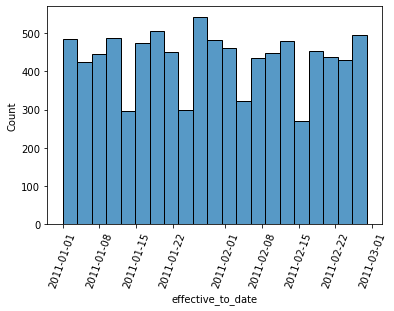

In [86]:
chart = sns.histplot(variable_customer_df['effective_to_date'])
plt.xticks(rotation=70)
plt.show()

# Lab | Comparing regression models

## In this final lab, we will model our data. Import sklearn train_test_split and separate the data.

In [87]:
from sklearn.model_selection import train_test_split

## We will start with removing outliers, if you have not already done so. We have discussed different methods to remove outliers. Use the one you feel more comfortable with, define a function for that. Use the function to remove the outliers and apply it to the dataframe.

In [88]:
def box_cont(x):

    for column in x.columns:
        sns.boxplot(y=x[column])
        plt.show()
    
    return plt

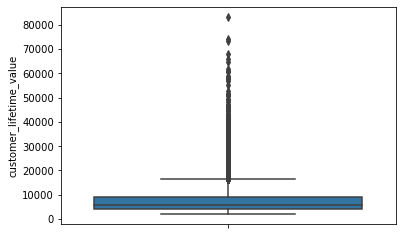

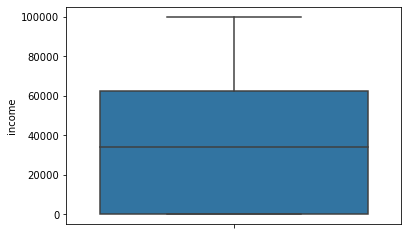

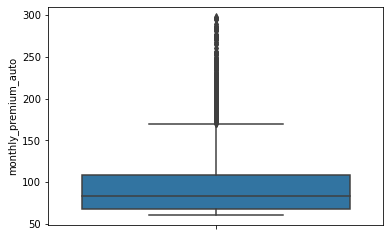

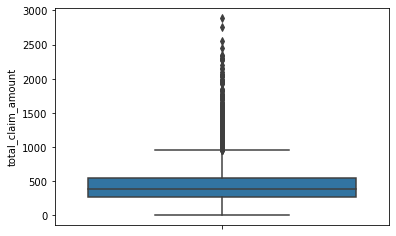

<module 'matplotlib.pyplot' from '/Users/ozguryildirim/opt/anaconda3/lib/python3.9/site-packages/matplotlib/pyplot.py'>


In [89]:
print(box_cont(continuous_df))

In [90]:
def outliers(column):
        
    q25 = np.percentile(sorted(column),25)

    q75 = np.percentile(sorted(column),75) 
        
    iqr = q75 - q25
    
    upper_limit = q75 + 1.5*iqr
    
    lower_limit = q25 - 1.5*iqr
        
    outliers = [x for x in column if x <= lower_limit or x >= upper_limit]
    
    return outliers

In [91]:
tca_outliers = outliers(continuous_df['total_claim_amount'])
tca_outliers

[1131.464935,
 982.399613,
 975.107098,
 1087.995426,
 1122.658899,
 1836.0,
 1124.427734,
 1284.093173,
 2345.413441,
 1101.6,
 1159.2,
 1252.406235,
 1003.160633,
 1317.6,
 1090.86434,
 1337.063487,
 980.169081,
 1324.8,
 1171.93117,
 1214.4,
 1002.782553,
 1210.920949,
 2027.724442,
 1382.4,
 1577.674417,
 1193.036154,
 1300.8,
 1265.570302,
 1022.4,
 1300.8,
 1254.137899,
 972.0,
 1310.4,
 1360.8,
 1416.0,
 1008.0,
 2893.239678,
 1185.988301,
 1228.8,
 1353.6,
 1027.000029,
 1027.177255,
 1336.931716,
 1067.333126,
 1418.4,
 1027.2,
 1300.8,
 1149.203884,
 1027.2,
 1261.943541,
 964.8,
 1294.700423,
 1253.984948,
 1027.000029,
 1032.0,
 973.787176,
 1358.4,
 1207.084251,
 1605.6,
 989.105367,
 1294.700423,
 972.0,
 1965.6,
 1448.994134,
 1186.972445,
 979.2,
 1178.995926,
 1353.6,
 1377.6,
 1777.471271,
 1382.4,
 1767.348807,
 1171.2,
 964.8,
 1227.458548,
 1072.8,
 1051.2,
 2201.327879,
 1012.249308,
 1052.933035,
 1272.546918,
 1128.0,
 1286.4,
 1129.929433,
 1171.537594,
 1012.8

In [92]:
income_outliers = outliers(continuous_df['income'])
income_outliers # income column has no outlier

[]

In [93]:
customer_lifetime_value_outliers = outliers(continuous_df['customer_lifetime_value'])
customer_lifetime_value_outliers

[24127.50402,
 24127.50402,
 18975.45611,
 36707.42639,
 33473.34946,
 24261.01777,
 22643.83478,
 58166.55351,
 20946.19251,
 24084.5352,
 31221.7481,
 19776.56654,
 21343.46599,
 16936.27147,
 23706.11337,
 32269.85139,
 25755.27817,
 16706.11699,
 17840.19555,
 17930.60451,
 29328.04185,
 22855.61209,
 16727.56063,
 18042.47942,
 31161.74523,
 25585.72783,
 32654.8383,
 22103.5072,
 18211.14319,
 23444.90045,
 33473.34946,
 44795.46942,
 28685.82785,
 18929.3306,
 24143.87556,
 29091.23936,
 19834.20115,
 35537.846,
 34611.37896,
 20216.30883,
 27776.28906,
 21903.91364,
 18073.93999,
 23594.6802,
 19582.46887,
 36057.53702,
 20714.94043,
 17497.52201,
 35850.59935,
 23875.47675,
 30475.78048,
 21435.87782,
 26843.12452,
 29194.36639,
 27789.69235,
 21423.63723,
 25830.90982,
 24127.50402,
 17857.97233,
 17771.54902,
 18269.27017,
 27580.55396,
 21147.27716,
 22500.88348,
 24980.22553,
 18361.55525,
 32196.60037,
 34931.00171,
 19069.49954,
 40224.01359,
 21850.84002,
 44771.29936,


In [94]:
monthly_premium_auto_outliers = outliers(continuous_df['monthly_premium_auto'])
monthly_premium_auto_outliers

[237,
 172,
 186,
 192,
 217,
 255,
 190,
 245,
 225,
 171,
 244,
 183,
 176,
 183,
 230,
 177,
 196,
 276,
 253,
 180,
 203,
 192,
 198,
 193,
 271,
 188,
 271,
 206,
 196,
 193,
 182,
 189,
 295,
 210,
 182,
 239,
 188,
 256,
 188,
 173,
 196,
 192,
 285,
 197,
 199,
 214,
 171,
 198,
 271,
 214,
 175,
 199,
 194,
 181,
 180,
 239,
 222,
 215,
 283,
 248,
 223,
 239,
 273,
 213,
 185,
 188,
 287,
 180,
 196,
 192,
 297,
 244,
 201,
 192,
 189,
 196,
 235,
 196,
 183,
 268,
 171,
 182,
 211,
 192,
 187,
 235,
 276,
 185,
 198,
 242,
 193,
 186,
 210,
 210,
 175,
 199,
 180,
 197,
 223,
 215,
 276,
 276,
 180,
 186,
 172,
 215,
 212,
 199,
 249,
 181,
 187,
 240,
 196,
 189,
 181,
 181,
 225,
 199,
 192,
 201,
 245,
 193,
 295,
 191,
 187,
 199,
 186,
 181,
 239,
 199,
 195,
 180,
 216,
 173,
 182,
 199,
 196,
 194,
 185,
 249,
 185,
 191,
 199,
 181,
 193,
 211,
 214,
 187,
 179,
 232,
 244,
 193,
 181,
 181,
 182,
 214,
 183,
 185,
 185,
 187,
 198,
 211,
 190,
 186,
 181,
 212,
 181

In [95]:
# The 'outliers' function determines that the columns of continuous_df except 'income' have outliers.

In [96]:
# Two solutions:
# 1. log transform is a way to deal with outliers
# 2. remove outliers

In [97]:
def log_transfom_clean(x):
    if x>0:
        return np.log(x)
    else:
        return np.NAN # We are returning NaNs so that we can replace them later

In [98]:
def plothist(col):
    pd.Series(variable_customer_df[col].apply(log_transfom_clean)).hist()
    plt.show()
    
    return None

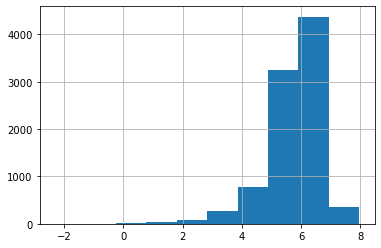

In [99]:
plothist('total_claim_amount')

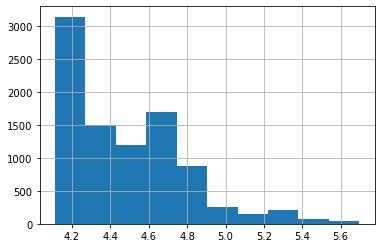

In [100]:
plothist('monthly_premium_auto')

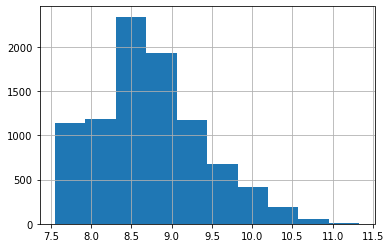

In [101]:
plothist('customer_lifetime_value')

In [102]:
variable_customer_df['total_claim_amount'].mean()

434.0887943128942

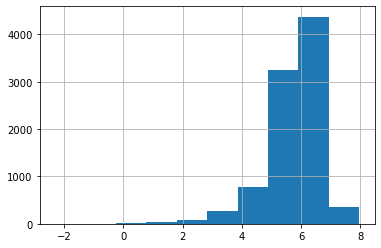

In [103]:
variable_customer_df['total_claim_amount_transformed'] = variable_customer_df['total_claim_amount'].apply(log_transfom_clean)

# replace NaNs with mean of transformed data
variable_customer_df['total_claim_amount_transformed'] = variable_customer_df['total_claim_amount_transformed'].fillna(np.mean(variable_customer_df['total_claim_amount_transformed']))
variable_customer_df['total_claim_amount_transformed'].hist()
plt.show()

In [104]:
variable_customer_df['monthly_premium_auto'].mean()

93.21929056273265

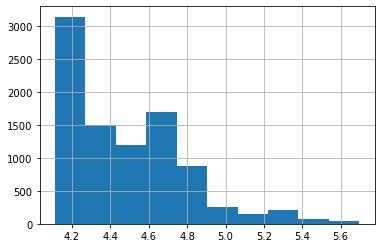

In [105]:
variable_customer_df['monthly_premium_auto_transformed'] = variable_customer_df['monthly_premium_auto'].apply(log_transfom_clean)

# replace NaNs with mean of transformed data
variable_customer_df['monthly_premium_auto_transformed'] = variable_customer_df['monthly_premium_auto_transformed'].fillna(np.mean(variable_customer_df['monthly_premium_auto_transformed']))
variable_customer_df['monthly_premium_auto_transformed'].hist()
plt.show()

In [106]:
variable_customer_df['customer_lifetime_value'].mean()

8004.9404749870755

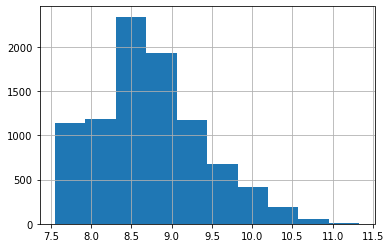

In [107]:
variable_customer_df['customer_lifetime_value_transformed'] = variable_customer_df['customer_lifetime_value'].apply(log_transfom_clean)

# replace NaNs with mean of transformed data
variable_customer_df['customer_lifetime_value_transformed'] = variable_customer_df['customer_lifetime_value_transformed'].fillna(np.mean(variable_customer_df['customer_lifetime_value_transformed']))
variable_customer_df['customer_lifetime_value_transformed'].hist()
plt.show()

In [108]:
variable_customer_df['customer_lifetime_value_transformed'].mean()

8.748561782441614

In [109]:
variable_customer_df['monthly_premium_auto_transformed'].mean()

4.4823303243736845

In [110]:
variable_customer_df['total_claim_amount_transformed'].mean()

5.790425152109063

In [111]:
variable_customer_df['total_claim_amount_transformed'].value_counts(dropna=False)

5.758271    116
5.679490    110
5.743003    108
5.859075    105
5.802722    102
           ... 
5.933419      1
3.043813      1
5.637988      1
5.591475      1
6.673026      1
Name: total_claim_amount_transformed, Length: 5106, dtype: int64

In [112]:
def ul_ll(column):
        
    q25 = np.percentile(sorted(column),25)

    q75 = np.percentile(sorted(column),75) 
        
    iqr = q75 - q25
    
    upper_limit = q75 + 1.5*iqr
    
    lower_limit = q25 - 1.5*iqr
        
    return upper_limit, lower_limit

In [113]:
income_upperl_lowerl = ul_ll(variable_customer_df['income'])
income_upperl_lowerl # income column has no outlier

(155800.0, -93480.0)

In [114]:
total_claim_amount_upperl_lowerl = ul_ll(variable_customer_df['total_claim_amount_transformed'])
total_claim_amount_upperl_lowerl # income column has no outlier

(7.353347257270782, 4.558793261718426)

In [115]:
monthly_premium_auto_upperl_lowerl = ul_ll(variable_customer_df['monthly_premium_auto_transformed'])
monthly_premium_auto_upperl_lowerl # income column has no outlier

(5.399108147808699, 3.5117474395965522)

In [116]:
customer_lifetime_value_upperl_lowerl = ul_ll(variable_customer_df['customer_lifetime_value_transformed'])
customer_lifetime_value_upperl_lowerl # income column has no outlier

(10.313001003057334, 7.0803778658926175)

In [117]:
variable_customer_df_customer_lifetime_valueNaN_dropped_1 = variable_customer_df[variable_customer_df['customer_lifetime_value_transformed'] <= 10.313001003057334].copy()

In [118]:
variable_customer_df_customer_lifetime_valueNaN_dropped_2 = variable_customer_df[variable_customer_df['customer_lifetime_value_transformed'] >= 7.0803778658926175].copy()

In [119]:
variable_customer_df_customer_lifetime_valueNaN_dropped = pd.concat([variable_customer_df_customer_lifetime_valueNaN_dropped_1,variable_customer_df_customer_lifetime_valueNaN_dropped_2],axis=0)
variable_customer_df_customer_lifetime_valueNaN_dropped

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,total_claim_amount_transformed,monthly_premium_auto_transformed,customer_lifetime_value_transformed
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,5.952753,4.234107,7.924260
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,7.031268,4.543295,8.850738
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,6.339428,4.682131,9.464008
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,6.272653,4.663439,8.941920
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,4.928202,4.290459,7.942253
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2011-02-10,Employed,M,71941,Urban,Married,73,18,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize,5.289452,4.290459,10.060747
9130,PK87824,California,3096.511217,Yes,Extended,College,2011-02-12,Employed,F,21604,Suburban,Divorced,79,14,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize,5.938064,4.369448,8.038031
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2011-02-06,Unemployed,M,0,Suburban,Single,85,9,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize,6.673026,4.442651,9.007476
9132,UP19263,California,7524.442436,No,Extended,College,2011-02-03,Employed,M,21941,Suburban,Married,96,34,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large,6.538429,4.564348,8.925912


In [120]:
variable_customer_df_customer_lifetime_valueNaN_dropped_1 = variable_customer_df[variable_customer_df['monthly_premium_auto_transformed'] <= 5.399108147808699].copy()

In [121]:
variable_customer_df_customer_lifetime_valueNaN_dropped_2 = variable_customer_df[variable_customer_df['monthly_premium_auto_transformed'] >= 3.5117474395965522].copy()

In [122]:
variable_customer_df_customer_lifetime_valueNaN_dropped = pd.concat([variable_customer_df_customer_lifetime_valueNaN_dropped_1,variable_customer_df_customer_lifetime_valueNaN_dropped_2],axis=0)
variable_customer_df_customer_lifetime_valueNaN_dropped

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,total_claim_amount_transformed,monthly_premium_auto_transformed,customer_lifetime_value_transformed
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,5.952753,4.234107,7.924260
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,7.031268,4.543295,8.850738
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,6.339428,4.682131,9.464008
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,6.272653,4.663439,8.941920
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,4.928202,4.290459,7.942253
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2011-02-10,Employed,M,71941,Urban,Married,73,18,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize,5.289452,4.290459,10.060747
9130,PK87824,California,3096.511217,Yes,Extended,College,2011-02-12,Employed,F,21604,Suburban,Divorced,79,14,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize,5.938064,4.369448,8.038031
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2011-02-06,Unemployed,M,0,Suburban,Single,85,9,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize,6.673026,4.442651,9.007476
9132,UP19263,California,7524.442436,No,Extended,College,2011-02-03,Employed,M,21941,Suburban,Married,96,34,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large,6.538429,4.564348,8.925912


In [123]:
variable_customer_df_customer_lifetime_valueNaN_dropped_1 = variable_customer_df[variable_customer_df['total_claim_amount_transformed'] <= 7.353347257270782].copy()

In [124]:
variable_customer_df_customer_lifetime_valueNaN_dropped_2 = variable_customer_df[variable_customer_df['total_claim_amount_transformed'] >= 4.558793261718426].copy()

In [125]:
variable_customer_df_customer_lifetime_valueNaN_dropped = pd.concat([variable_customer_df_customer_lifetime_valueNaN_dropped_1,variable_customer_df_customer_lifetime_valueNaN_dropped_2X = pd.concat([X_normalized, onehot_encoded], axis=1) X = pd.concat([X_normalized, onehot_encoded], axis=1) ],axis=0)
variable_customer_df_customer_lifetime_valueNaN_dropped

SyntaxError: invalid syntax (3689105021.py, line 1)

## Create a copy of the dataframe for the data wrangling.

In [ ]:
data = variable_customer_df_customer_lifetime_valueNaN_dropped

In [ ]:
data

## Normalize the continuous variables. You can use any one method you want.

In [ ]:
y = data['total_claim_amount_transformed']
X = data.drop(['total_claim_amount_transformed'], axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train_num = X_train.select_dtypes(include = np.number)
X_train_cat = X_train.select_dtypes(include = object)
X_test_num = X_test.select_dtypes(include = np.number)
X_test_cat = X_test.select_dtypes(include = object)

In [ ]:
continuous_df = data[['customer_lifetime_value_transformed', 'income','monthly_premium_auto_transformed','total_claim_amount_transformed']]
continuous_df

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
MinMaxtransformer = MinMaxScaler().fit(continuous_df)
X_normalized = MinMaxtransformer.transform(continuous_df)
print(type(X_normalized))
X_normalized = pd.DataFrame(X_normalized,columns=continuous_df.columns)
display(X_normalized.head())
print(type(X_normalized))

## Encode the categorical variables (See the hint below for encoding categorical data!!!)

In [ ]:
discrete_df = data[['state','coverage','employmentstatus','location_code','marital_status','policy_type',
                    'policy','renew_offer_type','customer','months_since_last_claim', 
                    'months_since_policy_inception','number_of_open_complaints','number_of_policies',
                   'sales_channel','vehicle_class','vehicle_size']]
discrete_df

In [ ]:
onehot_columns=data[['state','marital_status','policy_type',
                    'policy','renew_offer_type','customer','months_since_last_claim', 
                    'months_since_policy_inception','number_of_open_complaints','number_of_policies',
                   'sales_channel','vehicle_class']]

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
encoder = OneHotEncoder(drop='first').fit(onehot_columns)

In [ ]:
cols = encoder.get_feature_names(input_features=onehot_columns.columns)

In [ ]:
print(encoder.categories_)

In [ ]:
encoded = encoder.transform(onehot_columns).toarray()

In [ ]:
print(encoded)

In [ ]:
onehot_encoded = pd.DataFrame(encoded,columns=cols)

In [ ]:
onehot_encoded.head()

In [ ]:
ordinal = data[['coverage','employmentstatus','location_code','vehicle_size']]

In [ ]:
ordinal["coverage"] = ordinal["coverage"].map({"Basic" : 0, "Extended" : 1, "Premium" : 2})

In [ ]:
ordinal["employmentstatus"] = ordinal["employmentstatus"].map({"Employed" : 0, "Unemployed" : 1, "Medical Leave" : 2,"Disabled" : 3,"Retired" : 4})

In [ ]:
ordinal["location_code"] = ordinal["location_code"].map({"Suburban" : 0, "Rural" : 1, "Urban" : 2})

In [ ]:
ordinal["vehicle_size"] = ordinal["vehicle_size"].map({"Medsize" : 0, "Small" : 1, "Large" : 2})

In [ ]:
onehot_encoded.reset_index()

In [ ]:
onehot_encoded = onehot_encoded.loc[~onehot_encoded.index.duplicated(keep='first')]

In [ ]:
ordinal.reset_index()

In [ ]:
ordinal = ordinal.loc[~ordinal.index.duplicated(keep='first')]

In [ ]:
onehotencoded = pd.concat([onehot_encoded,ordinal],axis=1)

In [ ]:
onehotencoded

## The time variable can be useful. Try to transform its data into a useful one. Hint: Day week and month as integers might be useful.

In [ ]:
data.dtypes

In [ ]:
data['year'] = data['effective_to_date'].dt.year

In [ ]:
data['month'] = data['effective_to_date'].dt.month

In [ ]:
data['day'] = data['effective_to_date'].dt.day

In [ ]:
data

## Since the model will only accept numerical data, check and make sure that every column is numerical, if some are not, change it using encoding.

In [ ]:
onehotencoded = onehotencoded.loc[~onehotencoded.index.duplicated(keep='first')]

In [ ]:
continuous_df = continuous_df.loc[~continuous_df.index.duplicated(keep='first')]

In [ ]:
data['year'] = data['year'].loc[~data['year'].index.duplicated(keep='first')]
data.shape

In [ ]:
data['month'] = data['month'].loc[~data['month'].index.duplicated(keep='first')]

In [ ]:
data['day'] = data['day'].loc[~data['day'].index.duplicated(keep='first')]

In [ ]:
date = data[['day','month','year']]

In [ ]:
data_new = pd.concat([continuous_df, onehotencoded], axis=1)
data_new

In [ ]:
data = data[~data.index.duplicated()]

In [ ]:
date = date[~date.index.duplicated()]

In [ ]:
data_new2 = pd.concat([data_new, date], axis=1)
data_new2

In [ ]:
data_new2.dtypes

In [ ]:
X_cat = data_new2.select_dtypes(include = object)
X_cat # no categoricals. all variables are numerical

In [ ]:
# Scaling data
# we use the transformer that was trained on the training data
X_test_normalized = MinMaxtransformer.transform(X_test_num)
X_test_norm = pd.DataFrame(X_test_normalized)
X_test_norm.shape

In [ ]:
#Encoding categoricals using previous encoder
#We do not need to fit again.
encoded = encoder.transform(X_test_cat).toarray()
cols = encoder.get_feature_names(input_features=X_test_cat.columns)
onehot_encoded_test = pd.DataFrame(encoded,columns=cols)

## Try a simple linear regression with all the data to see whether we are getting good results.

In [ ]:
from sklearn import linear_model

In [ ]:
lm = linear_model.LinearRegression()
lm.fit(X_train,y_train)

## Great! Now define a function that takes a list of models and train (and tests) them so we can try a lot of them without repeating code.

## Use the function to check LinearRegressor and KNeighborsRegressor.

## You can check also the MLPRegressor for this task!

## Check and discuss the results.

# Lab | Random variable distributions

## Get the numerical variables from our dataset.

In [ ]:
variable_customer_df_num = variable_customer_df.select_dtypes(include = np.number)
variable_customer_df_num.columns

In [ ]:
variable_customer_df_num.dtypes

In [ ]:
variable_customer_df_cat = variable_customer_df.select_dtypes(include = np.object)
variable_customer_df_cat                                                             

In [ ]:
variable_customer_df_cat.dtypes

## Check using a distribution plot if the variables fit the theoretical normal or exponential distribution.

In [ ]:
# Numerical variables of data shows an exponential distribution.

In [ ]:
def plot(x):

    for column in x.columns:
        sns.displot(x[column], kde=True)
        plt.show()
    
    return plt

In [ ]:
print(plot(variable_customer_df_num))

## Check if any of the transformations (log-transform, etc.) we have seen up to this point changes the result.

In [ ]:
# Log transformation is applied for continuous and discrete variables. Number of open complaints and income
# data has been changed. The data from remaining columns do not change.

In [127]:
def log_transfom_clean(x):
    if x>0:
        return np.log(x)
    else:
        return np.NAN # We are returning NaNs so that we can replace them later

In [128]:
def plothist(col):
    pd.Series(variable_customer_df[col].apply(log_transfom_clean)).hist()
    plt.show()
    
    return None

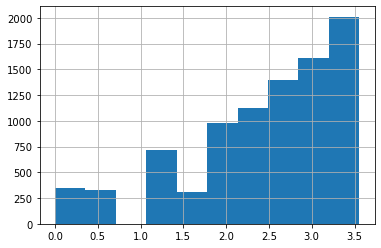

In [139]:
plothist('months_since_last_claim')

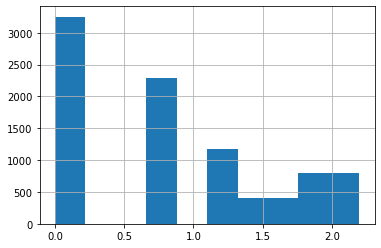

In [142]:
plothist('number_of_policies')

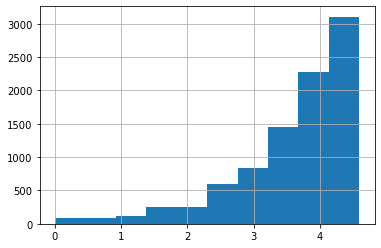

In [140]:
plothist('months_since_policy_inception')

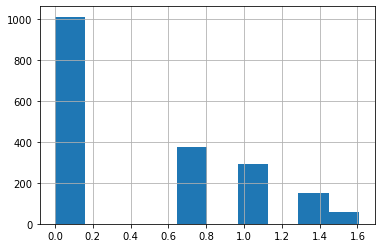

In [141]:
plothist('number_of_open_complaints')

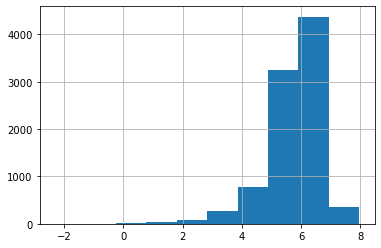

In [129]:
plothist('total_claim_amount')

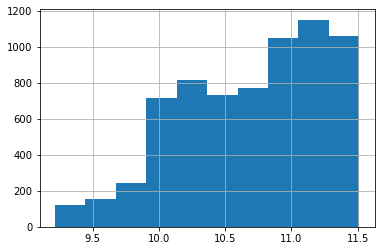

In [143]:
plothist('income')

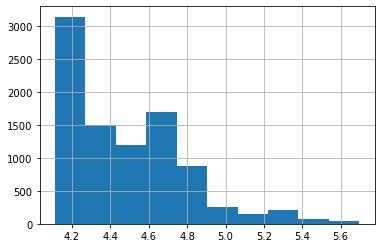

In [130]:
plothist('monthly_premium_auto')

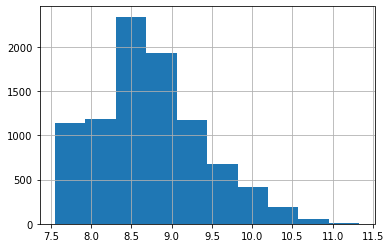

In [131]:
plothist('customer_lifetime_value')

In [138]:
variable_customer_df['total_claim_amount'].mean()

434.0887943128942

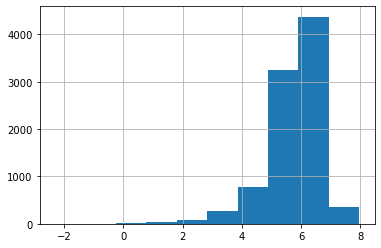

In [133]:
variable_customer_df['total_claim_amount_transformed'] = variable_customer_df['total_claim_amount'].apply(log_transfom_clean)

# replace NaNs with mean of transformed data
variable_customer_df['total_claim_amount_transformed'] = variable_customer_df['total_claim_amount_transformed'].fillna(np.mean(variable_customer_df['total_claim_amount_transformed']))
variable_customer_df['total_claim_amount_transformed'].hist()
plt.show()

In [134]:
variable_customer_df['monthly_premium_auto'].mean()

93.21929056273265

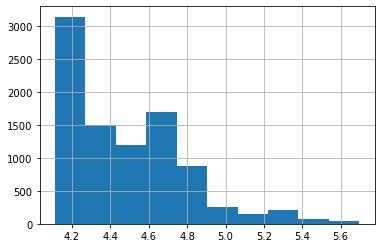

In [135]:
variable_customer_df['monthly_premium_auto_transformed'] = variable_customer_df['monthly_premium_auto'].apply(log_transfom_clean)

# replace NaNs with mean of transformed data
variable_customer_df['monthly_premium_auto_transformed'] = variable_customer_df['monthly_premium_auto_transformed'].fillna(np.mean(variable_customer_df['monthly_premium_auto_transformed']))
variable_customer_df['monthly_premium_auto_transformed'].hist()
plt.show()

In [136]:
variable_customer_df['customer_lifetime_value'].mean()

8004.9404749870755

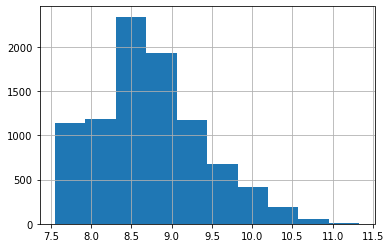

In [137]:
variable_customer_df['customer_lifetime_value_transformed'] = variable_customer_df['customer_lifetime_value'].apply(log_transfom_clean)

# replace NaNs with mean of transformed data
variable_customer_df['customer_lifetime_value_transformed'] = variable_customer_df['customer_lifetime_value_transformed'].fillna(np.mean(variable_customer_df['customer_lifetime_value_transformed']))
variable_customer_df['customer_lifetime_value_transformed'].hist()
plt.show()

In [144]:
variable_customer_df['income'].mean()

37657.38000875848

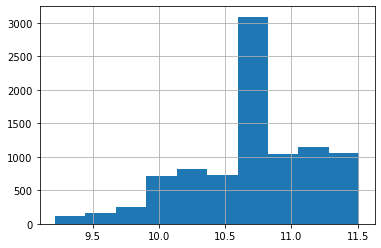

In [147]:
variable_customer_df['income_transformed'] = variable_customer_df['income'].apply(log_transfom_clean)

# replace NaNs with mean of transformed data
variable_customer_df['income_transformed'] = variable_customer_df['income_transformed'].fillna(np.mean(variable_customer_df['income_transformed']))
variable_customer_df['income_transformed'].hist()
plt.show()


In [152]:
variable_customer_df['number_of_open_complaints'].mean()

0.38438800087584846

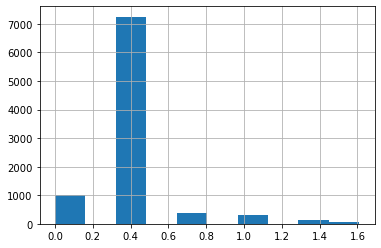

In [153]:
variable_customer_df['number_of_open_complaints_transformed'] = variable_customer_df['number_of_open_complaints'].apply(log_transfom_clean)

# replace NaNs with mean of transformed data
variable_customer_df['number_of_open_complaints_transformed'] = variable_customer_df['number_of_open_complaints_transformed'].fillna(np.mean(variable_customer_df['number_of_open_complaints_transformed']))
variable_customer_df['number_of_open_complaints_transformed'].hist()
plt.show()


In [148]:
variable_customer_df['number_of_policies'].mean()

15.097000218962119

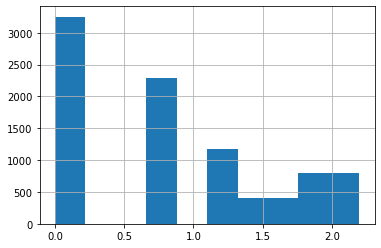

In [154]:
variable_customer_df['number_of_policies_transformed'] = variable_customer_df['number_of_policies'].apply(log_transfom_clean)

# replace NaNs with mean of transformed data
variable_customer_df['number_of_policies_transformed'] = variable_customer_df['number_of_policies_transformed'].fillna(np.mean(variable_customer_df['number_of_policies_transformed']))
variable_customer_df['number_of_policies_transformed'].hist()
plt.show()


In [148]:
variable_customer_df['months_since_last_claim'].mean()

15.097000218962119

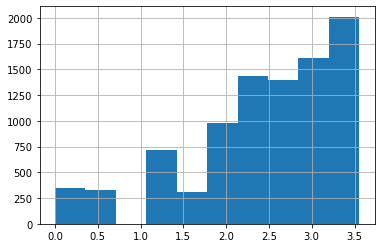

In [149]:
variable_customer_df['months_since_last_claim_transformed'] = variable_customer_df['months_since_last_claim'].apply(log_transfom_clean)

# replace NaNs with mean of transformed data
variable_customer_df['months_since_last_claim_transformed'] = variable_customer_df['months_since_last_claim_transformed'].fillna(np.mean(variable_customer_df['months_since_last_claim_transformed']))
variable_customer_df['months_since_last_claim_transformed'].hist()
plt.show()


In [150]:
variable_customer_df['months_since_policy_inception'].mean()

48.064593825268226

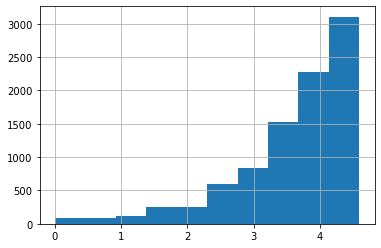

In [151]:
variable_customer_df['months_since_policy_inception_transformed'] = variable_customer_df['months_since_policy_inception'].apply(log_transfom_clean)

# replace NaNs with mean of transformed data
variable_customer_df['months_since_policy_inception_transformed'] = variable_customer_df['months_since_policy_inception_transformed'].fillna(np.mean(variable_customer_df['months_since_policy_inception_transformed']))
variable_customer_df['months_since_policy_inception_transformed'].hist()
plt.show()
